Conditional Node Graph

In [25]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [26]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    result: str

In [27]:
def add_number(state: AgentState) -> AgentState:
    output = state['number1'] + state['number2']
    state['result'] = f"The sum of {state['number1']} and {state['number2']} is {output}."
    return state

In [28]:
def subtract_number(state: AgentState) -> AgentState:
    output = state['number1'] - state['number2']
    state['result'] = f"The difference when {state['number2']} is subtracted from {state['number1']} is {output}."
    return state

In [ ]:
def check_operation(state: AgentState) -> str:
    if state['operation'] == 'add':
        return 'add_operation'
    elif state['operation'] == 'subtract':
        return 'subtract_operation'
    else:
        raise ValueError("Unsupported operation. Please use 'add' or 'subtract'.")

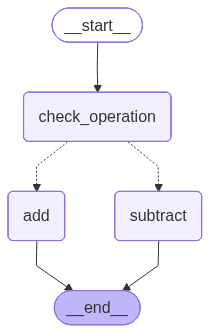

In [ ]:
graph = StateGraph(AgentState)
graph.add_edge(START, 'check_operation')
graph.add_node('check_operation', lambda state: state)
graph.add_conditional_edges('check_operation', check_operation, {
    # Edge : Node
    'add_operation': 'add',
    'subtract_operation': 'subtract'
})
graph.add_node('add', add_number)
graph.add_node('subtract', subtract_number)
graph.add_edge('add', END)
graph.add_edge('subtract', END)
graph.compile(name='conditional_graph_example')

In [31]:
initial_state: AgentState = {
    'number1': 15,
    'operation': 'add',  # Change to 'subtract' to test subtraction
    'number2': 10,   
    'result': ''
}
app = graph.compile(name='conditional_graph_example')
final_state = app.invoke(initial_state)
print(final_state['result'])


The sum of 15 and 10 is 25.
